# Assignment-2
By K. Sai Somanath, 18MCMT28, M.Tech, CS.

## Question 2

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [6]:
def my_dithering(in_image):
    image = cv2.copyMakeBorder(in_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    (x, y, z) = image.shape
    for k in range(z):
        for i in range(1, x-1):
            for j in range(1, y-1):
                    old_pixel = image[i][j][k]
                    new_pixel = 255 * math.floor(old_pixel / 128)
                    image[i][j][k] = new_pixel
                    error = old_pixel - new_pixel
                    image[i + 1][j    ][k] = image[i + 1][j    ][k] + error * 1 / 5
                    image[i - 1][j + 1][k] = image[i - 1][j + 1][k] + error * 2 / 5
                    image[i    ][j + 1][k] = image[i    ][j + 1][k] + error * 1 / 5
                    image[i + 1][j + 1][k] = image[i + 1][j + 1][k] + error * 1 / 5
    return image

In [7]:
def floyd_dithering(in_image):
    image = cv2.copyMakeBorder(in_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    (x, y, z) = image.shape
    print(image.dtype)
    for k in range(z):
        for i in range(1, x-1):
            for j in range(1, y-1):
                old_pixel = image[i][j][k]
                new_pixel = 255 * math.floor(old_pixel / 128)
                image[i][j][k] = new_pixel
                error = old_pixel - new_pixel
                image[i + 1][j    ][k] = image[i + 1][j    ][k] + error * (7 / 16.)
                image[i - 1][j + 1][k] = image[i - 1][j + 1][k] + error * (3 / 16.)
                image[i    ][j + 1][k] = image[i    ][j + 1][k] + error * (5 / 16.)
                image[i + 1][j + 1][k] = image[i + 1][j + 1][k] + error * (1 / 16.)
    return image

(400, 640, 3)


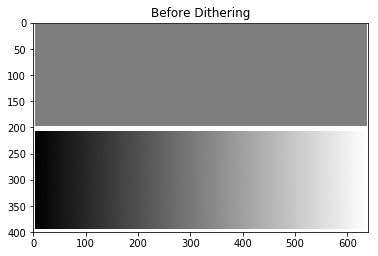

uint8
Type: uint8


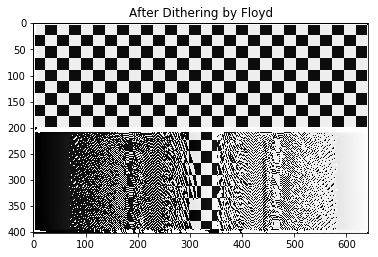

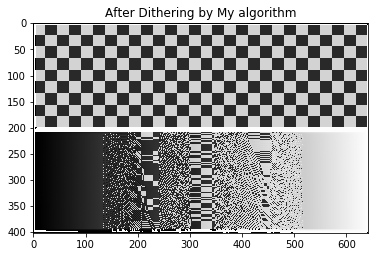

In [8]:
image = cv2.imread('Images/ed-eg.png')
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Before Dithering')
plt.show()
img = floyd_dithering(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print('Type:', img.dtype)
plt.imshow(img, cmap="gray")
plt.title('After Dithering by Floyd')
plt.show()
plt.imshow(my_dithering(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))
plt.title('After Dithering by My algorithm')
plt.show()

In [16]:
def masks(shape, pattern):
    pattern = pattern.upper()

    channels = dict((channel, np.zeros(shape)) for channel in 'RGB')
    for channel, (y, x) in zip(pattern, [(0, 0), (0, 1), (1, 0), (1, 1)]):
        channels[channel][y::2, x::2] = 1

    return tuple(channels[c].astype(bool) for c in 'RGB')

print(masks((2,2 ), 'RGGB'))

(array([[ True, False],
       [False, False]]), array([[False,  True],
       [ True, False]]), array([[False, False],
       [False,  True]]))


In [32]:
def colour_filter(image, _filter):
    (height, width, channals) = image.shape
    img_cfa = np.zeros(image.shape[:2])
    
#     for i in range(1, height - 1, 2):
#         for j in range(1, width - 1, 2):
#             img_cfa[i,j] = image[i,j,_filter[0,0]]
#             img_cfa[i+1,j] = image[i+1,j,_filter[0,1]]
#             img_cfa[i,j+1] = image[i,j+1,_filter[0,0]]
#             img_cfa[i+1,j+1] = image[i+1,j+1,_filter[0,0]]
    r, g, b = masks(image.shape[:2], 'RGGB')      
    img_cfa = image[:,:,0] * r + image[:,:,1] * g + image[:,:,2] * b
    return img_cfa, r, g, b

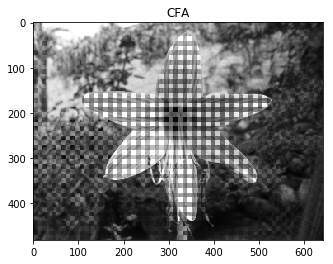

In [33]:
img = cv2.imread('Images/orange-flower.ppm')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
_filter = np.array([[1,2],[0,2]])
output, _0, _1, _2 = colour_filter(img, _filter)
plt.imshow(output,cmap='gray')
plt.title('CFA')
plt.show()

In [37]:
img[:,:, 0][_0 == True].shape

(77361,)

307200